In [16]:
import math
import numpy as np
import pandas as pd
from collections import Counter
from PyImpetus import PPIMBC
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import time

In [73]:
original_ais_df=pd.read_pickle('AIS_UNACORN_Seatracks.pkl')
original_ais_df.head()

,cog,sog,beam,callsign,cargo,heading,imonumber,latitude,length,longitude,mmsi,name,navstatus,timeoffix,vesseltype,date
0,64.0,11.0,65.0,9V9123,0-AllShips,64.0,9532599.0,-25.420000,360.0,84.633333,563950000,Yuan Zhuo Hai,0-Underway(Engine),1607606344,7-Cargo,2020-12-10
1,65.4,12.1,65.0,9V9123,0-AllShips,64.0,9532599.0,-25.294915,360.0,84.933403,563950000,Yuan Zhuo Hai,0-Underway(Engine),1607611680,7-Cargo,2020-12-10
2,323.0,14.1,35.0,V7QX3,0-AllShips,320.0,9813113.0,-24.770147,228.0,106.331890,538008009,Barramundi,0-Underway(Engine),1607611196,7-Cargo,2020-12-10
3,339.8,19.8,32.0,HOMQ,0-AllShips,342.0,9536818.0,-24.511267,199.0,111.501532,371158000,Gaia Leader,0-Underway(Engine),1607611210,7-Cargo,2020-12-10
4,337.8,10.7,32.0,V7JI6,0-AllShips,338.0,9712709.0,-25.042857,199.0,111.283643,538006056,Star Lutas,0-Underway(Engine),1607611211,7-Cargo,2020-12-10


In [18]:
original_ais_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103997 entries, 0 to 103996
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   cog         103997 non-null  float64       
 1   sog         103997 non-null  float64       
 2   beam        102611 non-null  float64       
 3   callsign    102611 non-null  object        
 4   cargo       102611 non-null  object        
 5   heading     103997 non-null  float64       
 6   imonumber   102611 non-null  float64       
 7   latitude    103997 non-null  float64       
 8   length      102611 non-null  float64       
 9   longitude   103997 non-null  float64       
 10  mmsi        103997 non-null  int64         
 11  name        102611 non-null  object        
 12  navstatus   103997 non-null  object        
 13  timeoffix   103997 non-null  int64         
 14  vesseltype  102611 non-null  object        
 15  date        103997 non-null  datetime64[ns]
dtypes:

In [76]:
original_ais_df=original_ais_df[['cog','sog', 'beam','latitude','longitude','heading', 'length','mmsi']].dropna()

In [77]:
original_ais_df=original_ais_df.head(10000)

In [78]:
len(original_ais_df)

10000

In [79]:
data, Y = original_ais_df.drop(['mmsi'], axis=1), original_ais_df['mmsi'].values

In [80]:
data=original_ais_df[['cog','sog', 'beam','latitude','longitude','heading', 'length']]

In [21]:

# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]
    
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

Score:  0.00204648443210057
Score:  0.0018516713770587662
Score:  0.0018516713770587662
Score:  0.0023389533183900205
Score:  0.0018516713770587662


Average Accuracy:  0.0019880903763333777


Total Time Required (in seconds):  4558.521675348282


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed: 24.6min remaining: 18.4min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 25.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.8min remaining:  8.8min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.0min remaining:   52.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.7min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  3.9min remaining:   52.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.7min remaining:  

Markov Blanket:  ['cog', 'sog', 'beam', 'latitude', 'longitude', 'heading', 'length']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


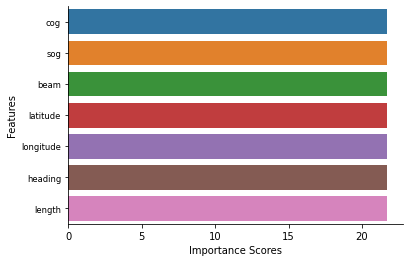

Score:  0.3315


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed: 24.1min remaining: 18.0min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 24.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.8min remaining:  8.8min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.1min remaining:   54.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.7min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.0min remaining:   53.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
/home/users/aswin1906/.local/lib/python3.8/site-packages/joblib/externals/

Markov Blanket:  ['cog', 'sog', 'beam', 'latitude', 'longitude', 'heading', 'length']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


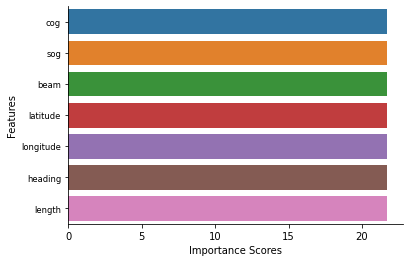

Score:  0.3215


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed: 25.3min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 25.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.9min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.2min remaining:   55.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.8min remaining:  8.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.1min remaining:   54.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.8min remaining:  

Markov Blanket:  ['cog', 'sog', 'beam', 'latitude', 'longitude', 'heading', 'length']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.7min finished


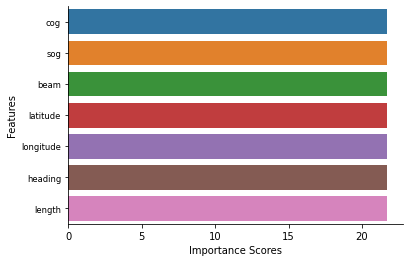

Score:  0.33


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed: 23.6min remaining: 17.7min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 25.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.7min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.0min remaining:   53.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.8min remaining:  8.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.1min remaining:   54.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.7min remaining:  

Markov Blanket:  ['cog', 'sog', 'beam', 'latitude', 'longitude', 'heading', 'length']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.3min finished


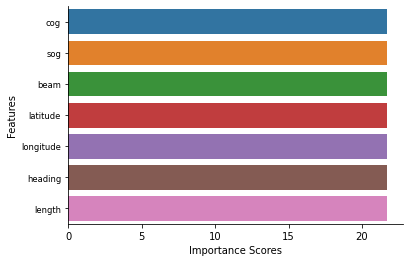

Score:  0.318


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed: 24.8min remaining: 18.6min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 26.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.8min remaining:  8.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.1min remaining:   54.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.7min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.2min remaining:   55.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:  3.8min remaining:  

Markov Blanket:  ['cog', 'sog', 'beam', 'latitude', 'longitude', 'heading', 'length']
Feature importance:  [21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471, 21.69653315944471]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


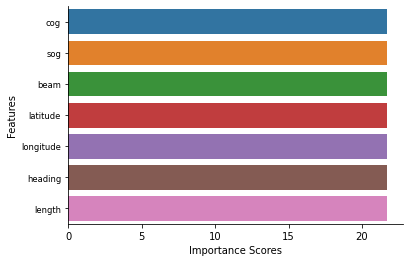

Score:  0.3155


Average Accuracy:  0.32330000000000003


Total Time Required (in seconds):  17410.022884368896


In [81]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    # NOTE: To achieve fast selection, set cv=0 for disabling the use of any internal cross-validation
    model = PPIMBC(LogisticRegression(random_state=27), cv=0, num_simul=50, random_state=27, verbose=2)
    # Fit this above object on the train part and transform the train dataset into selected feature subset
    # NOTE: x_train has to be a dataframe and y_train has to be a numpy array
    x_train = model.fit_transform(x_train, y_train)
    # Transform the test set as well
    # NOTE: x_test has to be a dataframe
    x_test = model.transform(x_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    # NOTE: You can use these scores ina feature selection ensemble
    print("Feature importance: ", model.feat_imp_scores)
    # Plot the feature importance scores
    model.feature_importance()
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)